### Basic Time Series

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

#### Date_range

In [2]:
pd.Series(range(3), index=pd.date_range(start="2000", freq="D", periods=3))

2000-01-01    0
2000-01-02    1
2000-01-03    2
Freq: D, dtype: int64

In [3]:
a=pd.Series(pd.date_range("2000-1-31", freq="Y", periods=3))
a

0   2000-12-31
1   2001-12-31
2   2002-12-31
dtype: datetime64[ns]

In [4]:
# Calculate difference
b=pd.Timestamp.now()-a
b

0   7711 days 17:30:27.303877
1   7346 days 17:30:27.303877
2   6981 days 17:30:27.303877
dtype: timedelta64[ns]

In [5]:
# Calculate age
b.astype('timedelta64[Y]')

0    21.0
1    20.0
2    19.0
dtype: float64

#### Timestamp

In [6]:
pd.Timestamp(dt.datetime(2022,1,11))

Timestamp('2022-01-11 00:00:00')

In [7]:
pd.Timestamp('2022-1-11')

Timestamp('2022-01-11 00:00:00')

In [8]:
pd.Timestamp(2022,1,11)

Timestamp('2022-01-11 00:00:00')

In [9]:
pd.Timestamp(2022,2,7).quarter

1

In [10]:
pd.Timestamp.now()

Timestamp('2022-02-10 17:30:27.624423')

#### Period

In [11]:
c=pd.Period('2022-1')
c

Period('2022-01', 'M')

In [12]:
c.start_time

Timestamp('2022-01-01 00:00:00')

In [13]:
c.end_time

Timestamp('2022-01-31 23:59:59.999999999')

In [14]:
c.days_in_month

31

In [15]:
pd.Period('2022-1',freq='D')

Period('2022-01-01', 'D')

#### Date offset vs Timedelta

In [16]:
#unit: all types
#increments a date by 1 calendar day (23, 24, or 25 hours depending on day light savings time)
pd.Timestamp(2014,11,1)+pd.DateOffset(years=1,hours=26)

Timestamp('2015-11-02 02:00:00')

In [17]:
#unit: days,hours,minutes....
#increments a date by 24 hours
pd.Timestamp(2011,11,1)+pd.Timedelta(weeks=1,days=1,hours=26)

Timestamp('2011-11-10 02:00:00')

#### DataFrame with time

In [18]:
dates=[pd.Timestamp('2022-1-1'),pd.Timestamp('2022-1-2'),pd.Timestamp('2022-1-3')]
dates

[Timestamp('2022-01-01 00:00:00'),
 Timestamp('2022-01-02 00:00:00'),
 Timestamp('2022-01-03 00:00:00')]

In [19]:
dates=['2022-1-1','2022-1-2','2022-1-3']
dates=pd.to_datetime(dates)

In [20]:
dates

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03'], dtype='datetime64[ns]', freq=None)

In [21]:
ts_date=pd.Series(np.random.randn(3),index=dates)
ts_date

2022-01-01   -3.563673
2022-01-02    0.464594
2022-01-03   -1.887528
dtype: float64

In [22]:
type(ts_date.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [23]:
ts_date.index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03'], dtype='datetime64[ns]', freq=None)

In [24]:
periods=[pd.Period('2022-1'),pd.Period('2022-2'),pd.Period('2022-3')]
periods

[Period('2022-01', 'M'), Period('2022-02', 'M'), Period('2022-03', 'M')]

In [25]:
ts_date=pd.Series(np.random.randn(3),index=periods)
ts_date

2022-01    0.962501
2022-02   -0.427884
2022-03    0.032400
Freq: M, dtype: float64

In [26]:
type(ts_date.index)

pandas.core.indexes.period.PeriodIndex

In [27]:
ts_date.index

PeriodIndex(['2022-01', '2022-02', '2022-03'], dtype='period[M]')

#### Convert timestamp

In [28]:
dti = pd.to_datetime(["1/1/2018", np.datetime64("2018-01-01"), dt.datetime(2018, 1, 1)])
dti

DatetimeIndex(['2018-01-01', '2018-01-01', '2018-01-01'], dtype='datetime64[ns]', freq=None)

In [29]:
pd.to_datetime(pd.Series(['Jul 13, 2021','2021-8-1',None,'2021/01/12','2021.11.13','2021/12/11 10:00']))

0   2021-07-13 00:00:00
1   2021-08-01 00:00:00
2                   NaT
3   2021-01-12 00:00:00
4   2021-11-13 00:00:00
5   2021-12-11 10:00:00
dtype: datetime64[ns]

In [30]:
pd.to_datetime('21/11/2012 10:11:00', format='%d/%m/%Y %H:%M:%S')

Timestamp('2012-11-21 10:11:00')

In [31]:
df=pd.DataFrame({'Year':[2011,2022,2033],
                'Month':[1,2,3],
                'day':[11,22,28]})
df

,Year,Month,day
0,2011,1,11
1,2022,2,22
2,2033,3,28


In [32]:
df['datetime']=pd.to_datetime(df.Year.astype(str)+'-'+df.Month.astype(str)+'-'+df.day.astype(str))
df['datetime']

0   2011-01-11
1   2022-02-22
2   2033-03-28
Name: datetime, dtype: datetime64[ns]

### Exercise

#### Load Data

In [33]:
df = pd.read_excel('W5_2_Airline_passenger.xlsx')

In [34]:
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [36]:
#the outcome needs to add 1 month
pd.to_datetime('1960-12').to_period('M')-pd.to_datetime('1949-1').to_period('M')

<143 * MonthEnds>

In [37]:
df['Month']=pd.to_datetime(df['Month'])

In [38]:
df=df.set_index(df['Month'])
df

,Month,Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121
...,...,...
1960-08-01,1960-08-01,606
1960-09-01,1960-09-01,508
1960-10-01,1960-10-01,461


In [39]:
df.drop(['Month'],axis=1,inplace=True)

In [40]:
#Confirm data type. Datetime is a string rather than a datestamp
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [41]:
df['1950-12-1':'1956-1-1']

,Passengers
Month,
1950-12-01,140
1951-01-01,145
1951-02-01,150
1951-03-01,178
1951-04-01,163
...,...
1955-09-01,312
1955-10-01,274
1955-11-01,237


#### Explore Data

In [42]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


<AxesSubplot:xlabel='Month'>

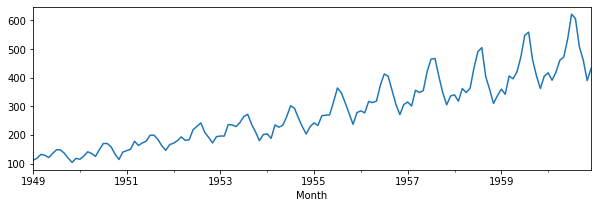

In [43]:
df['Passengers'].plot(figsize=(10,3))

#### Preprocess Data

In [44]:
df_train, df_test=train_test_split(df,test_size=0.1,shuffle=False)

In [45]:
df_test

,Passengers
Month,
1959-10-01,407
1959-11-01,362
1959-12-01,405
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535


In [46]:
df_train['p_lag1']=df_train['Passengers'].tshift(1)
df_train

,Passengers,p_lag1
Month,,
1949-01-01,112,NaN
1949-02-01,118,112.0
1949-03-01,132,118.0
1949-04-01,129,132.0
1949-05-01,121,129.0
...,...,...
1959-05-01,420,396.0
1959-06-01,472,420.0
1959-07-01,548,472.0


In [47]:
df_train['p_forward1']=df_train['Passengers'].tshift(-1)
df_train

,Passengers,p_lag1,p_forward1
Month,,,
1949-01-01,112,NaN,118.0
1949-02-01,118,112.0,132.0
1949-03-01,132,118.0,129.0
1949-04-01,129,132.0,121.0
1949-05-01,121,129.0,135.0
...,...,...,...
1959-05-01,420,396.0,472.0
1959-06-01,472,420.0,548.0
1959-07-01,548,472.0,559.0


In [48]:
df_train['p_ma2']=df_train['Passengers'].rolling(2).mean()
df_train

,Passengers,p_lag1,p_forward1,p_ma2
Month,,,,
1949-01-01,112,NaN,118.0,NaN
1949-02-01,118,112.0,132.0,115.0
1949-03-01,132,118.0,129.0,125.0
1949-04-01,129,132.0,121.0,130.5
1949-05-01,121,129.0,135.0,125.0
...,...,...,...,...
1959-05-01,420,396.0,472.0,408.0
1959-06-01,472,420.0,548.0,446.0
1959-07-01,548,472.0,559.0,510.0


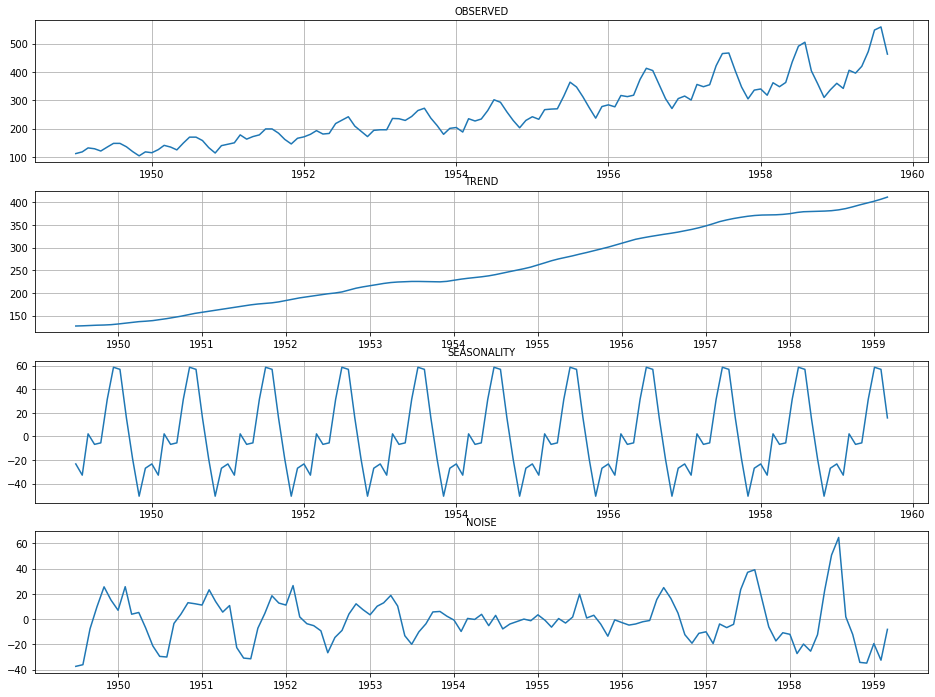

In [49]:
res=sm.tsa.seasonal_decompose(df_train['Passengers'])
fig, axs = plt.subplots(4, figsize=(16,12))
axs[0].set_title('OBSERVED', fontsize=10)
axs[0].plot(res.observed)
axs[0].grid()

axs[1].set_title('TREND', fontsize=10)
axs[1].plot(res.trend)
axs[1].grid()

axs[2].set_title('SEASONALITY', fontsize=10)
axs[2].plot(res.seasonal)
axs[2].grid()

axs[3].set_title('NOISE', fontsize=10)
axs[3].plot(res.resid)
axs[3].grid()

plt.show()

#### AR

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

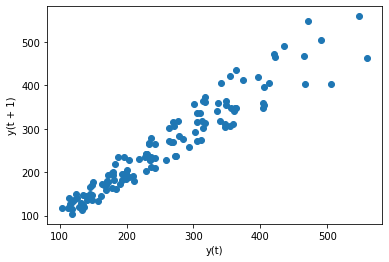

In [50]:
pd.plotting.lag_plot(df_train['Passengers'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

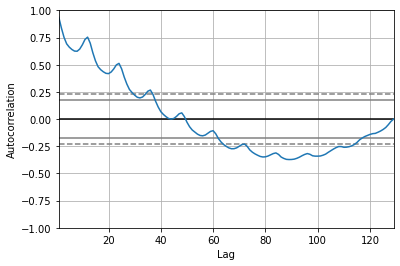

In [51]:
pd.plotting.autocorrelation_plot(df_train['Passengers'])

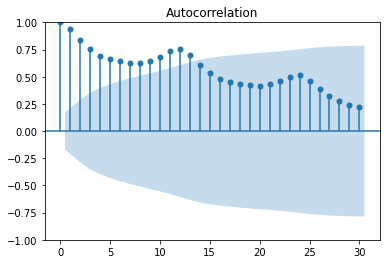

In [52]:
sm.graphics.tsa.plot_acf(df_train['Passengers'],lags=30)
plt.show()

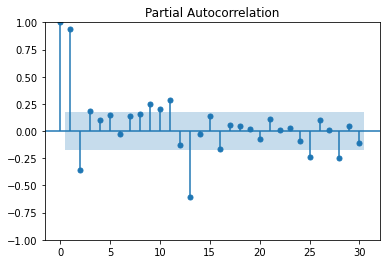

In [53]:
sm.graphics.tsa.plot_pacf(df_train['Passengers'],lags=30)
plt.show()

In [54]:
from statsmodels.tsa.ar_model import AutoReg
model=AutoReg(df_train['Passengers'],lags=13,trend='t',seasonal=True,period=12,exog=None,missing='drop')
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  129
Model:              Seas. AutoReg(13)   Log Likelihood                -410.269
Method:               Conditional MLE   S.D. of innovations              8.313
Date:                Thu, 10 Feb 2022   AIC                            874.539
Time:                        17:30:31   BIC                            948.886
Sample:                    02-01-1950   HQIC                           904.720
                         - 09-01-1959                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
trend              0.4480      0.212      2.109      0.035       0.032       0.864
s(1,12)           24.1515      8.420      2.868      0.004       7.649      40.654
s(2,12)            4.2930      8.292      0.518      0.605     -11.958      20.544
s(3,12)           24.4656      8.200      2.983      0.003       8.393      40.538
s(4,12)           18.8834      8.273      2.283      0.022       2.669      35.098
s(5,12)            8.9273      8.220      1.086      0.277      -7.184      25.039
s(6,12)           27.0717      8.081      3.350      0.001      11.234      42.909
s(7,12)           27.5562      8.290      3.324      0.001      11.308      43.804
s(8,12)           16.0005      8.485      1.886      0.059      -0.630      32.631
s(9,12)            2.9807      8.590      0.347      0.729     -13.856      19.817
s(10,12)          16.5027      8.591      1.921      0.055      -0.336      33.341
s(11,12)          10.5942      8.551      1.239      0.215      -6.165      27.354
s(12,12)          20.6058      8.416      2.448      0.014       4.111      37.101
Passengers.L1      0.7901      0.079     10.061      0.000       0.636       0.944
Passengers.L2      0.0676      0.096      0.702      0.483      -0.121       0.257
Passengers.L3     -0.1374      0.095     -1.453      0.146      -0.323       0.048
Passengers.L4     -0.0771      0.096     -0.805      0.421      -0.265       0.111
Passengers.L5      0.1507      0.095      1.579      0.114      -0.036       0.338
Passengers.L6     -0.1646      0.096     -1.709      0.087      -0.353       0.024
Passengers.L7      0.0877      0.098      0.896      0.370      -0.104       0.279
Passengers.L8     -0.1010      0.100     -1.008      0.313      -0.297       0.095
Passengers.L9      0.1181      0.100      1.176      0.239      -0.079       0.315
Passengers.L10    -0.2136      0.101     -2.118      0.034      -0.411      -0.016
Passengers.L11     0.2632      0.101      2.602      0.009       0.065       0.462
Passengers.L12     0.6261      0.102      6.142      0.000       0.426       0.826
Passengers.L13    -0.5734      0.083     -6.908      0.000      -0.736      -0.411
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.1108           -0.0000j            1.1108           -0.5000
AR.2            -0.8955           -0.4718j            1.0122           -0.4228
AR.3            -0.8955           +0.4718j            1.0122            0.4228
AR.4            -0.5490           -0.8718j            1.0302           -0.3394
AR.5            -0.5490           +0.8718j            1.0302            0.3394
AR.6             0.0027           -1.0253j            1.0253           -0.2496
AR.7             0.0027           +1.0253j  

In [55]:
pred=result.predict(start='1949-1-1',end='1959-09-1')

In [56]:
df_train['pred_ar']=pred
df_train

,Passengers,p_lag1,p_forward1,p_ma2,pred_ar
Month,,,,,
1949-01-01,112,NaN,118.0,NaN,NaN
1949-02-01,118,112.0,132.0,115.0,NaN
1949-03-01,132,118.0,129.0,125.0,NaN
1949-04-01,129,132.0,121.0,130.5,NaN
1949-05-01,121,129.0,135.0,125.0,NaN
...,...,...,...,...,...
1959-05-01,420,396.0,472.0,408.0,418.031875
1959-06-01,472,420.0,548.0,446.0,483.075136
1959-07-01,548,472.0,559.0,510.0,537.690975


In [57]:
df_train1=df_train.iloc[13:].copy()
df_train1

,Passengers,p_lag1,p_forward1,p_ma2,pred_ar
Month,,,,,
1950-02-01,126,115.0,141.0,120.5,112.582129
1950-03-01,141,126.0,135.0,133.5,146.921677
1950-04-01,135,141.0,125.0,138.0,139.735704
1950-05-01,125,135.0,149.0,130.0,127.142392
1950-06-01,149,125.0,170.0,137.0,147.521582
...,...,...,...,...,...
1959-05-01,420,396.0,472.0,408.0,418.031875
1959-06-01,472,420.0,548.0,446.0,483.075136
1959-07-01,548,472.0,559.0,510.0,537.690975


In [58]:
print('MAPE:', mean_absolute_percentage_error(df_train1['Passengers'],df_train1['pred_ar']))

MAPE: 0.026626061216493663


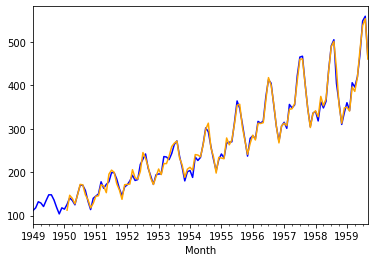

In [59]:
df_train['Passengers'].plot(color='blue')
df_train['pred_ar'].plot(color='orange')
plt.show()

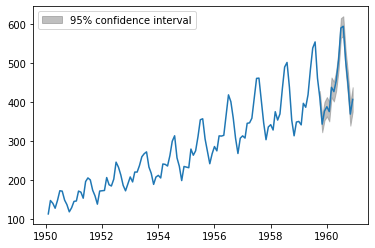

In [60]:
#df_train['Passengers'].plot(color='blue')
result.plot_predict('1949-1-1','1960-12-1')
plt.show()

In [61]:
pred=result.predict(start='1959-09-1',end='1960-12-1')
df_test['pred_ar']=pred
df_test

,Passengers,pred_ar
Month,,
1959-10-01,407,411.172756
1959-11-01,362,342.640398
1959-12-01,405,376.258352
1960-01-01,417,387.315261
1960-02-01,391,374.817361
1960-03-01,419,437.028801
1960-04-01,461,426.001174
1960-05-01,472,453.868500
1960-06-01,535,506.621348


In [62]:
print('MAPE:', mean_absolute_percentage_error(df_test['Passengers'],df_test['pred_ar']))

MAPE: 0.04562493325615944


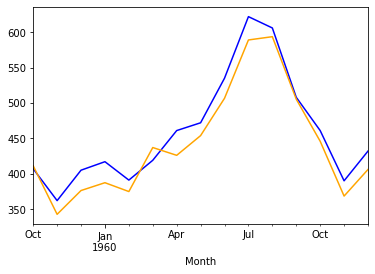

In [63]:
df_test['Passengers'].plot(color='blue')
df_test['pred_ar'].plot(color='orange')
plt.show()

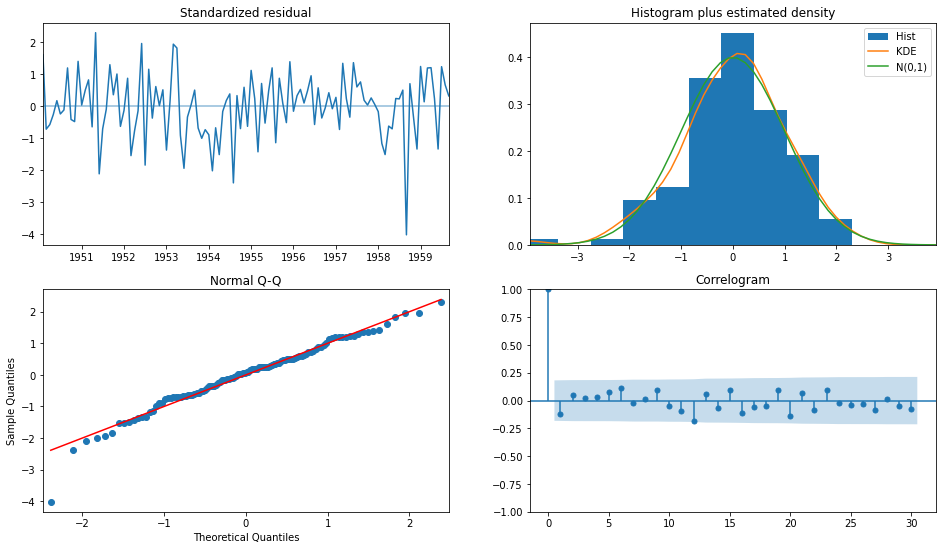

In [64]:
result.plot_diagnostics(figsize=(16,9),lags=30)
plt.show()

#### Windows forcasting

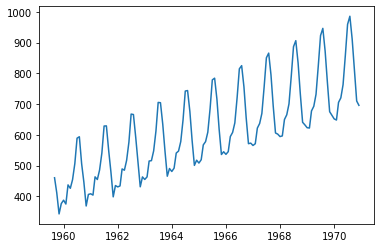

In [65]:
pred_long=result.predict(start='1959-09-1',end='1970-12-1')
plt.plot(pred_long)

In [66]:
df_test_shifted=df_test[['Passengers']].copy()

In [67]:
training_window=120
train_ts=df_train['Passengers']
test_ts=df_test_shifted
history=[x for x in train_ts]

In [68]:
# get first training window
history=history[(-training_window):]

In [69]:
prediction=list()

In [70]:
for t in range(len(test_ts)):
    model=AutoReg(history,lags=1,trend='t',seasonal=True,period=12,exog=None,missing='drop')
    model_fit=model.fit()
    yhat=model_fit.predict(start=len(history)+1,end=len(history)+1)
    prediction.append(yhat[0])
    obs=list(test_ts.iloc[t])
    # move the training window
    history.append(obs[0])
    history.pop(0)
df_test_shifted['yhat']=prediction


In [71]:
df_test_shifted

,Passengers,yhat
Month,,
1959-10-01,407,392.281106
1959-11-01,362,404.974592
1959-12-01,405,403.855270
1960-01-01,417,407.594906
1960-02-01,391,447.761722
1960-03-01,419,430.782174
1960-04-01,461,428.611376
1960-05-01,472,498.555788
1960-06-01,535,539.480145


In [72]:
mean_absolute_percentage_error(df_test_shifted['Passengers'],df_test_shifted['yhat'])

0.06486717440025269

#### ARIMA

In [73]:
df_train['p_d1']=df_train['Passengers']-df_train['p_lag1']
df_train

,Passengers,p_lag1,p_forward1,p_ma2,pred_ar,p_d1
Month,,,,,,
1949-01-01,112,NaN,118.0,NaN,NaN,NaN
1949-02-01,118,112.0,132.0,115.0,NaN,6.0
1949-03-01,132,118.0,129.0,125.0,NaN,14.0
1949-04-01,129,132.0,121.0,130.5,NaN,-3.0
1949-05-01,121,129.0,135.0,125.0,NaN,-8.0
...,...,...,...,...,...,...
1959-05-01,420,396.0,472.0,408.0,418.031875,24.0
1959-06-01,472,420.0,548.0,446.0,483.075136,52.0
1959-07-01,548,472.0,559.0,510.0,537.690975,76.0


In [74]:
sm.tsa.statespace.tools.diff(df_train['Passengers'],k_diff=1,k_seasonal_diff=None, seasonal_periods=1)

Month
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
              ... 
1959-05-01    24.0
1959-06-01    52.0
1959-07-01    76.0
1959-08-01    11.0
1959-09-01   -96.0
Name: Passengers, Length: 128, dtype: float64

<AxesSubplot:xlabel='Month'>

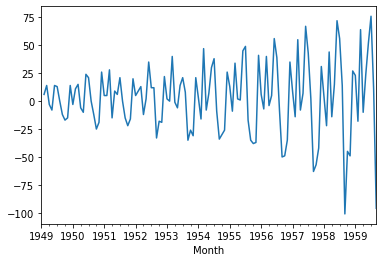

In [75]:
df_train['p_d1'].plot()

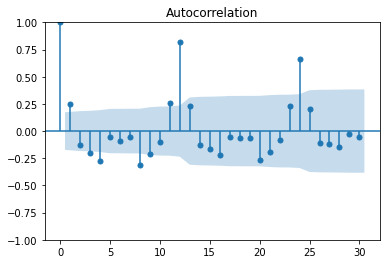

In [76]:
sm.graphics.tsa.plot_acf(df_train['p_d1'][1:],lags=30)
plt.show()

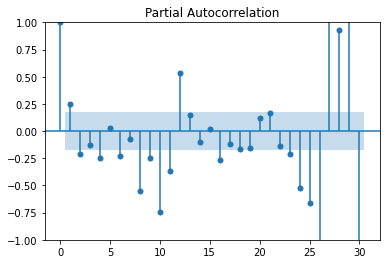

In [77]:
sm.graphics.tsa.plot_pacf(df_train['p_d1'][1:],lags=30)
plt.show()

In [78]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df_train['Passengers'],order=(1,1,1),trend=None,seasonal_order=(1,1,0,12),exog=None,missing='drop')
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                        Passengers   No. Observations:                  129
Model:             ARIMA(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -435.499
Date:                           Thu, 10 Feb 2022   AIC                            878.997
Time:                                   17:30:34   BIC                            890.011
Sample:                               01-01-1949   HQIC                           883.468
                                    - 09-01-1959                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5425      0.329     -1.651      0.099      -1.187       0.102
ma.L1          0.3246      0.354      0.916      0.360      -0.370       1.019
ar.S.L12      -0.0801      0.086     -0.933      0.351      -0.249       0.088
sigma2       106.6364     12.945      8.238      0.000      81.265     132.007
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.84
Prob(Q):                              0.99   Prob(JB):                         0.40
Heteroskedasticity (H):               1.54   Skew:                            -0.12
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
pred=result.predict(start='1959-09-1',end='1960-12-1')
df_test['pred_arima']=pred
df_test

,Passengers,pred_ar,pred_arima
Month,,,
1959-10-01,407,411.172756,415.813338
1959-11-01,362,342.640398,368.038888
1959-12-01,405,376.258352,394.998943
1960-01-01,417,387.315261,416.671792
1960-02-01,391,374.817361,398.245106
1960-03-01,419,437.028801,460.699789
1960-04-01,461,426.001174,450.347982
1960-05-01,472,453.868500,473.643627
1960-06-01,535,506.621348,527.237319


In [80]:
print('MAPE:', mean_absolute_percentage_error(df_test['Passengers'],df_test['pred_arima']))

MAPE: 0.028095771252134756


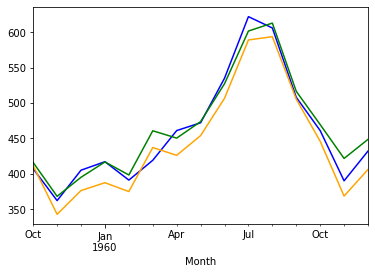

In [81]:
df_test['Passengers'].plot(color='blue')
df_test['pred_ar'].plot(color='orange')
df_test['pred_arima'].plot(color='green')
plt.show()